In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('base_telecomunicacao.xlsx',sheet_name='Sheet1')

In [4]:
df

Ocupacao  Idade Cidade_Nascimento Dispositivos  Renda_Mensal  \
0              NaN   60.0               NaN          NaN        5681.0   
1              NaN   21.0               NaN          NaN        6172.0   
2              NaN   21.0               NaN          NaN           NaN   
3              NaN   34.0               NaN          NaN        3782.0   
4              NaN    NaN               NaN          NaN           NaN   
...            ...    ...               ...          ...           ...   
4923  Desempregado    NaN    Rio de Janeiro            4           NaN   
4924    Engenheiro    NaN          Curitiba            2           NaN   
4925   Comerciante    NaN         São Paulo            3           NaN   
4926   Comerciante    NaN           Goiânia            1           NaN   
4927     Estudante    NaN            Maceió            1           NaN   

      Uso_Internet Troca_Celular  Satisfacao_Servico Operadora_Celular  \
0              8.0           NaN                 NaN               NaN   
1              8.0           NaN                 NaN               NaN   
2              2.0           NaN                 9.0               NaN   
3             11.0           NaN                 6.0               NaN   
4              6.0           NaN                 NaN               NaN   
...            ...           ...                 ...               ...   
4923           NaN      1-2 anos                 NaN              Vivo   
4924           NaN             ?                 NaN               TIM   
4925           NaN      1-2 anos                 NaN              Vivo   
4926           NaN      2-3 anos                 NaN             Claro   
4927           NaN           NaN                 NaN             Claro   

      Interesse_5G  ... Plano_5G      Motivo_Troca  Trabalho_Remoto  \
0              5.0  ...      NaN        Preco Alto              Nao   
1              2.0  ...      NaN               NaN              Nao   
2              8.0  ...      NaN  Atendimento Ruim              NaN   
3              2.0  ...      NaN  Atendimento Ruim              Nao   
4              1.0  ...      NaN               NaN              Nao   
...            ...  ...      ...               ...              ...   
4923           NaN  ...      Sim               NaN              NaN   
4924           NaN  ...      Sim               NaN              NaN   
4925           NaN  ...      Não               NaN              NaN   
4926           NaN  ...      Sim               NaN              NaN   
4927           NaN  ...      Não               NaN              NaN   

      Possui_Plano_Telefonia Servicos_Streaming Prioridade_Plano  \
0                        Sim                NaN       Velocidade   
1                        Sim                NaN            Preco   
2                        NaN                NaN       Velocidade   
3                        Sim                NaN        Cobertura   
4                        Sim                NaN        Cobertura   
...                      ...                ...              ...   
4923                     NaN                  1              NaN   
4924                     NaN                  1              NaN   
4925                     NaN                  2              NaN   
4926                     NaN                 3+              NaN   
4927                     NaN                  1              NaN   

      Pagar_Velocidade Atendimento_Recebido Plano_Familiar Satisfacao_Geral  
0                  NaN                  NaN            NaN              9.0  
1                  NaN                  NaN            NaN              6.0  
2                  Nao                  NaN            NaN              5.0  
3                  NaN                  7.0            NaN              0.0  
4                  Sim                  6.0            NaN              7.0  
...                ...                  ...            ...              ...  
4923            

In [5]:
df.describe()

,Idade,Renda_Mensal,Uso_Internet,Satisfacao_Servico,Interesse_5G,Pessoas_Residencia,Gasto_Internet,Interesse_Combo,Atendimento_Recebido,Satisfacao_Geral
count,1905.000000,1939.000000,1924.000000,1907.000000,1883.000000,1965.000000,1914.000000,1899.000000,1924.000000,1904.000000
mean,43.622572,9626.135637,6.549376,5.668065,5.587892,4.837659,274.261233,5.499210,5.630457,5.597689
std,17.288482,9663.569508,3.377937,2.805975,2.788717,2.603774,114.884545,2.746465,2.827715,2.826553
min,5.000000,-500.000000,0.000000,0.000000,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000
25%,31.000000,4342.000000,4.000000,4.000000,4.000000,3.000000,187.000000,4.000000,4.000000,4.000000
50%,43.000000,7662.000000,6.000000,6.000000,6.000000,4.000000,263.000000,6.000000,6.000000,6.000000
75%,56.000000,13689.500000,9.000000,8.000000,8.000000,7.000000,365.000000,7.000000,8.000000,8.000000
max,120.000000,100000.000000,15.000000,10.000000,10.000000,10.000000,500.000000,10.000000,10.000000,10.000000


In [6]:
df.dtypes

Ocupacao                   object
Idade                     float64
Cidade_Nascimento          object
Dispositivos               object
Renda_Mensal              float64
Uso_Internet              float64
Troca_Celular              object
Satisfacao_Servico        float64
Operadora_Celular          object
Interesse_5G              float64
Assistencia_TV             object
Preferencia_Compra         object
Pessoas_Residencia        float64
Gasto_Internet            float64
Plano_Preferencia          object
Conhecimento_IoT           object
Interesse_Combo           float64
Regiao                     object
Uso_Internet_5h            object
Genero                     object
Plano_Atual                object
Dispositivo_Utilizado      object
Plano_5G                   object
Motivo_Troca               object
Trabalho_Remoto            object
Possui_Plano_Telefonia     object
Servicos_Streaming         object
Prioridade_Plano           object
Pagar_Velocidade           object
Atendimento_Re

In [7]:
#Nao esquecer de calcular a corr geral antes e depois 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_corr = df.copy()
# Identificar as colunas do tipo 'object'
object_columns = df_corr.select_dtypes(include=['object']).columns

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada coluna de tipo 'object'
for col in object_columns:
    # Substituir NaN por um valor, como 'missing'
    df_corr[col] = df_corr[col].fillna('missing')

    df_corr[col] = df_corr[col].astype(str)
    
    # Aplicar o LabelEncoder
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# Ver o dataframe modificado
df_corr=df_corr.corr()
df_corr['Motivo_Troca']


Ocupacao                 -0.585727
Idade                    -0.014266
Cidade_Nascimento        -0.544689
Dispositivos             -0.653518
Renda_Mensal             -0.014633
Uso_Internet              0.021208
Troca_Celular            -0.605291
Satisfacao_Servico        0.023778
Operadora_Celular        -0.598664
Interesse_5G             -0.035194
Assistencia_TV           -0.556380
Preferencia_Compra       -0.637399
Pessoas_Residencia       -0.035701
Gasto_Internet           -0.063732
Plano_Preferencia        -0.615194
Conhecimento_IoT          0.474225
Interesse_Combo          -0.022383
Regiao                    0.486335
Uso_Internet_5h          -0.601099
Genero                    0.545480
Plano_Atual               0.490622
Dispositivo_Utilizado     0.558433
Plano_5G                 -0.619738
Motivo_Troca              1.000000
Trabalho_Remoto           0.539918
Possui_Plano_Telefonia    0.515340
Servicos_Streaming       -0.612164
Prioridade_Plano          0.492629
Pagar_Velocidade    

Limpeza dos dados

In [8]:

df.loc[df['Ocupacao'] == 'XYZ123', 'Ocupacao'] = np.nan
print(df['Ocupacao'].value_counts(dropna=False))

Ocupacao
NaN             2587
Estudante        484
Outro            455
Engenheiro       368
Autônomo         235
Comerciante      229
Médico           214
Professor        125
Desempregado     121
Advogado         110
Name: count, dtype: int64


In [9]:

df['Cidade_Nascimento'] = df['Cidade_Nascimento'].replace('sp', 'São Paulo')

df['Cidade_Nascimento'] = df['Cidade_Nascimento'].replace('São paulo', 'São Paulo')
df['Cidade_Nascimento'].value_counts()

Cidade_Nascimento
São Paulo         157
Aracaju           130
Curitiba          130
Teresina          123
Belo Horizonte    122
Florianópolis     121
Maceió            121
Goiânia           119
Campinas          116
Rio de Janeiro    115
Vitória           113
João Pessoa       113
Fortaleza         111
Natal             109
Brasília          108
Salvador          103
Belém             103
Manaus            101
Recife             95
Porto Alegre       91
Outra              88
Name: count, dtype: int64

In [10]:
df['Dispositivos'].value_counts(dropna=False)

Dispositivos
NaN    2478
2       958
3       736
1       362
4       224
5+      111
na       26
-1       19
Mu       14
Name: count, dtype: int64

In [11]:

df.loc[df['Dispositivos'] == 'Mu', 'Dispositivos'] = np.nan
df.loc[df['Dispositivos'] == 'na', 'Dispositivos'] = np.nan
df.loc[df['Dispositivos'] == '-1', 'Dispositivos'] = np.nan

print(df['Dispositivos'].value_counts(dropna=False))


Dispositivos
NaN    2537
2       958
3       736
1       362
4       224
5+      111
Name: count, dtype: int64


In [12]:
df.loc[df['Operadora_Celular'] == '123', 'Operadora_Celular'] = np.nan
df.loc[df['Operadora_Celular'] == 'indef', 'Operadora_Celular'] = np.nan
print(df['Operadora_Celular'].value_counts(dropna=False))

Operadora_Celular
NaN      2587
Claro     727
Vivo      586
TIM       429
Oi        341
Outra     258
Name: count, dtype: int64


In [13]:
df['Preferencia_Compra'] = df['Preferencia_Compra'].replace('ambos', 'Indiferente')
df['Preferencia_Compra'] = df['Preferencia_Compra'].replace('não sei', 'Indiferente')
df['Preferencia_Compra'].value_counts()

Preferencia_Compra
Online           1398
Lojas Físicas     743
Indiferente       297
Name: count, dtype: int64

In [14]:
df.loc[df['Plano_Preferencia'] == '?', 'Plano_Preferencia'] = np.nan
df['Plano_Preferencia'].value_counts()

Plano_Preferencia
Pós-pago    1454
Pré-pago     937
Name: count, dtype: int64

In [15]:
df.loc[df['Uso_Internet_5h'] == '?', 'Uso_Internet_5h'] = np.nan
df['Uso_Internet_5h'].value_counts()

Uso_Internet_5h
Sim    1664
Não     677
Name: count, dtype: int64

In [16]:
df.loc[df['Servicos_Streaming'] == 'Não sei', 'Servicos_Streaming'] = np.nan
df.loc[df['Servicos_Streaming'] == '-', 'Servicos_Streaming'] = np.nan
df['Servicos_Streaming'].value_counts()

Servicos_Streaming
1         926
2         604
Nenhum    465
3+        235
Name: count, dtype: int64

In [17]:
df.loc[df['Plano_Familiar'] == '?', 'Plano_Familiar'] = np.nan
df['Plano_Familiar'].value_counts()

Plano_Familiar
Sim    1190
Não    1151
Name: count, dtype: int64

In [18]:

df.loc[df['Troca_Celular'] == '?', 'Troca_Celular'] = np.nan

Troca_Celular
1-2 anos          1156
2-3 anos           734
Mais de 3 anos     352
<1 ano              99
nunca               43
Name: count, dtype: int64

In [19]:
df['Conhecimento_IoT'].value_counts()

Conhecimento_IoT
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [20]:
import numpy as np

# Definir o limite de caracteres
limite_caracteres = 1000

# Remover textos longos (com mais de 1000 caracteres) e substituir por NaN
df['Conhecimento_IoT'] = df['Conhecimento_IoT'].apply(
    lambda x: np.nan if isinstance(x, str) and len(x) > limite_caracteres else x
)


print(df['Conhecimento_IoT'].value_counts(dropna=False))


NaN     3015
5.0      283
6.0      251
7.0      247
4.0      237
0.0      156
1.0      155
2.0      144
3.0      141
8.0      104
9.0      103
10.0      92
Name: Conhecimento_IoT, dtype: int64


In [21]:
df_escolhidos = df[['Ocupacao', 'Idade', 'Renda_Mensal', 'Gasto_Internet', 'Regiao', 'Genero', 'Plano_Atual', 'Motivo_Troca']]
df_escolhidos.head()


,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
0,NaN,60.0,5681.0,368.0,Sudeste,Feminino,Basico,Preco Alto
1,NaN,21.0,6172.0,NaN,NaN,Masculino,Basico,NaN
2,NaN,21.0,NaN,NaN,NaN,Feminino,NaN,Atendimento Ruim
3,NaN,34.0,3782.0,394.0,NaN,NaN,Basico,Atendimento Ruim
4,NaN,NaN,NaN,339.0,Nordeste,Masculino,Basico,NaN


In [22]:
df_escolhidos.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,1905.000000,1939.000000,1914.000000
mean,43.622572,9626.135637,274.261233
std,17.288482,9663.569508,114.884545
min,5.000000,-500.000000,51.000000
25%,31.000000,4342.000000,187.000000
50%,43.000000,7662.000000,263.000000
75%,56.000000,13689.500000,365.000000
max,120.000000,100000.000000,500.000000


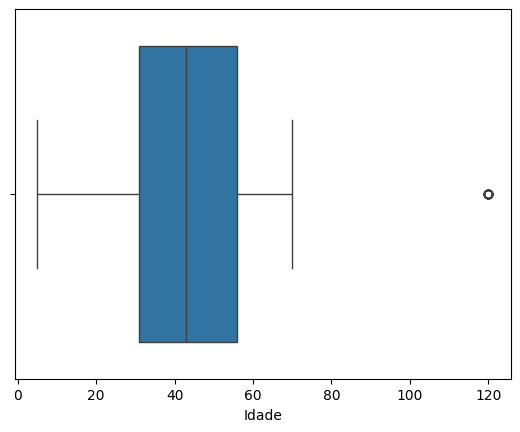

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_escolhidos['Idade'])
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/791149785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(120,70)
/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/791149785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(5,18)


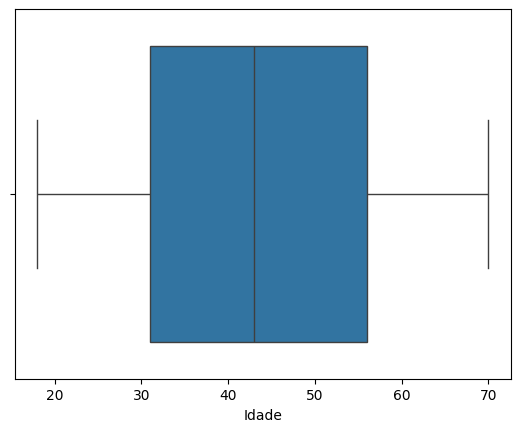

In [65]:
df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(120,70)
df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(5,18)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_escolhidos['Idade'])
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/1087627321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(100000, 19980)
/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/1087627321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(-500, 1324)


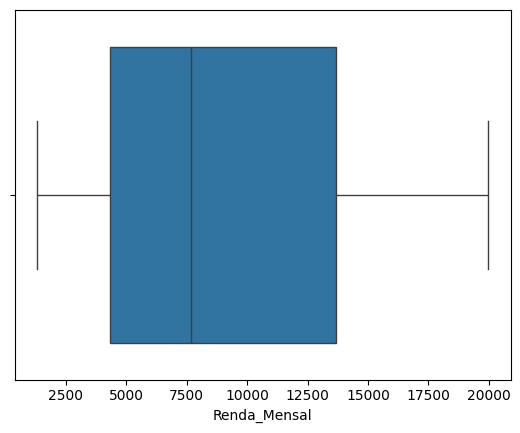

In [67]:
import seaborn as sns
df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(100000, 19980)
df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(-500, 1324)

sns.boxplot(x=df_escolhidos['Renda_Mensal'])
plt.show()

In [69]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Supondo que df_escolhido já esteja definido
# df_escolhido = pd.DataFrame(...)  # Seu DataFrame com dados qualitativos e quantitativos

# Separa as variáveis quantitativas e qualitativas
df_quantitative = df_escolhidos.select_dtypes(include=['float64', 'int64'])
df_qualitative = df_escolhidos.select_dtypes(include=['object', 'category'])

# Imputação das variáveis quantitativas com IterativeImputer
imp_quantitative = IterativeImputer(max_iter=10, random_state=0)
df_quantitative_imputed = pd.DataFrame(np.round(imp_quantitative.fit_transform(df_quantitative), 1), columns=df_quantitative.columns)

# Imputação das variáveis qualitativas com SimpleImputer (usando a moda para imputação)
imp_qualitative = SimpleImputer(strategy='most_frequent')
df_qualitative_imputed = pd.DataFrame(imp_qualitative.fit_transform(df_qualitative), columns=df_qualitative.columns)

# Rejunta as variáveis quantitativas e qualitativas imputadas
df_escolhido_imputed = pd.concat([df_quantitative_imputed, df_qualitative_imputed], axis=1)

# Mostra as primeiras linhas do DataFrame com valores imputados
df_escolhido_imputed.head(10)


,Idade,Renda_Mensal,Gasto_Internet,Ocupacao,Regiao,Genero,Plano_Atual,Motivo_Troca
0,60.0,5681.0,368.0,Estudante,Sudeste,Feminino,Basico,Preco Alto
1,21.0,6172.0,266.1,Estudante,Sudeste,Masculino,Basico,Atendimento Ruim
2,21.0,9025.0,266.7,Estudante,Sudeste,Feminino,Basico,Atendimento Ruim
3,34.0,3782.0,394.0,Estudante,Sudeste,Feminino,Basico,Atendimento Ruim
4,43.8,9025.0,339.0,Estudante,Nordeste,Masculino,Basico,Atendimento Ruim
5,47.0,4396.0,94.0,Estudante,Nordeste,Feminino,Premium,Atendimento Ruim
6,43.3,9025.0,287.0,Estudante,Sudeste,Masculino,Basico,Preco Alto
7,43.0,5783.0,227.0,Estudante,Sudeste,Masculino,Premium,Atendimento Ruim
8,37.0,9025.0,350.0,Estudante,Nordeste,Feminino,Basico,Preco Alto
9,43.0,2845.0,62.0,Estudante,Sudeste,Feminino,Premium,Atendimento Ruim


In [74]:
df_escolhidos.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,1905.000000,1939.000000,1914.000000
mean,43.236220,9024.978339,274.261233
std,15.069686,5505.247953,114.884545
min,18.000000,1324.000000,51.000000
25%,31.000000,4342.000000,187.000000
50%,43.000000,7662.000000,263.000000
75%,56.000000,13689.500000,365.000000
max,70.000000,19980.000000,500.000000


In [73]:
df_escolhido_imputed.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,4928.000000,4928.000000,4928.000000
mean,43.220191,9024.989550,274.205885
std,9.372502,3452.728975,71.603500
min,18.000000,1324.000000,51.000000
25%,43.200000,9024.900000,273.000000
50%,43.200000,9025.000000,274.200000
75%,43.200000,9025.000000,274.200000
max,70.000000,19980.000000,500.000000


In [75]:
#Nao esquecer de calcular a corr geral antes e depois 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_corr = df_escolhidos.copy()
# Identificar as colunas do tipo 'object'
object_columns = df_corr.select_dtypes(include=['object']).columns

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada coluna de tipo 'object'
for col in object_columns:
    # Substituir NaN por um valor, como 'missing'
    df_corr[col] = df_corr[col].fillna('missing')

    df_corr[col] = df_corr[col].astype(str)
    
    # Aplicar o LabelEncoder
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# Ver o dataframe modificado
df_corr=df_corr.corr()
df_corr

,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
Ocupacao,1.000000,NaN,NaN,NaN,-0.537146,-0.602581,-0.574123,-0.552011
Idade,NaN,1.000000,-0.017884,0.068811,-0.028130,-0.028166,-0.013813,-0.016083
Renda_Mensal,NaN,-0.017884,1.000000,0.010390,-0.049945,0.002676,0.034509,-0.012304
Gasto_Internet,NaN,0.068811,0.010390,1.000000,0.013842,-0.001833,-0.004599,-0.063732
Regiao,-0.537146,-0.028130,-0.049945,0.013842,1.000000,0.536254,0.492750,0.486335
Genero,-0.602581,-0.028166,0.002676,-0.001833,0.536254,1.000000,0.561952,0.545480
Plano_Atual,-0.574123,-0.013813,0.034509,-0.004599,0.492750,0.561952,1.000000,0.490622
Motivo_Troca,-0.552011,-0.016083,-0.012304,-0.063732,0.486335,0.545480,0.490622,1.000000


In [76]:
#Nao esquecer de calcular a corr geral antes e depois 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_corr = df_escolhido_imputed.copy()
# Identificar as colunas do tipo 'object'
object_columns = df_corr.select_dtypes(include=['object']).columns

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada coluna de tipo 'object'
for col in object_columns:
    # Substituir NaN por um valor, como 'missing'
    df_corr[col] = df_corr[col].fillna('missing')

    df_corr[col] = df_corr[col].astype(str)
    
    # Aplicar o LabelEncoder
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# Ver o dataframe modificado
df_corr=df_corr.corr()
df_corr

,Idade,Renda_Mensal,Gasto_Internet,Ocupacao,Regiao,Genero,Plano_Atual,Motivo_Troca
Idade,1.000000,-1.746802e-02,0.077307,3.572199e-04,-0.022276,0.004936,-0.007738,0.014216
Renda_Mensal,-0.017468,1.000000e+00,0.009687,-5.018949e-07,-0.037633,0.000617,-0.029098,-0.011778
Gasto_Internet,0.077307,9.686728e-03,1.000000,1.362799e-05,0.015036,0.003684,-0.022322,-0.024924
Ocupacao,0.000357,-5.018949e-07,0.000014,1.000000e+00,-0.052861,0.079801,0.076098,0.090704
Regiao,-0.022276,-3.763334e-02,0.015036,-5.286082e-02,1.000000,-0.188778,-0.141574,-0.157031
Genero,0.004936,6.165492e-04,0.003684,7.980144e-02,-0.188778,1.000000,0.185072,0.250186
Plano_Atual,-0.007738,-2.909807e-02,-0.022322,7.609753e-02,-0.141574,0.185072,1.000000,0.242961
Motivo_Troca,0.014216,-1.177768e-02,-0.024924,9.070372e-02,-0.157031,0.250186,0.242961,1.000000
